Planning to do recipe recommendations based on ingrediants

Profiles for users and recipes need to be constructed to store which ingrediants are favorite to the user and the ingrediant content of each recipe.

Steps:
1. Extract recipe ingrediants from RAW_Recipes -( Try to use the preprocessed data as well)
2. Construct an ingrediant vector for all recipes
3. Find the ingrediants in the recipes positively rated by the use
4. Build user vector based on the favorite recipe ingrediants
5. Estimate similarity between user and recipe profiles based on ingrediants
6. Recommend recipes with highest similarity

Do we need to consider more than ingrediants for our feature vectors ?

PP_RECIPES.csv dataset includes unique keys for each recipe and its ingredients, also in the form of unique IDs.

Preprocessing can involve 
1. removing the most popular ingrediants like salt, butter, egg, onion, sugar, olive oil, water, milk, pepper, baking
soda, black pepper
2. remove ingrediants that appeared in fewer recipes
3. remove recipes with fewer than five ingrediants


In [2]:
import pickle
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
recipes = pd.read_csv("../data/PP_recipes.csv")
recipes.head()

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
4,76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[3484, 6324, 7594, 243]"


In [4]:
recipe_ingrediants = recipes[['id','ingredient_ids']]

In [5]:
raw_recipes = pd.read_csv("../data/RAW_recipes.csv")

In [7]:
print(len(recipe_ingrediants))
print(len(raw_recipes))

178265
231637


In [46]:
recipe_ingrediants.iloc[0]

id                                       424415
ingredient_ids    [389, 7655, 6270, 1527, 3406]
Name: 0, dtype: object

In [6]:
raw_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [8]:
recipes_final = pd.merge(
    recipe_ingrediants,
    raw_recipes,
    how="inner",
    on='id')

In [9]:
recipes_final.shape

(178265, 13)

In [10]:
recipes_final.head()

,id,ingredient_ids,name,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,424415,"[389, 7655, 6270, 1527, 3406]",aromatic basmati rice rice cooker,61,496803,2010-05-10,"['weeknight', 'time-to-make', 'course', 'main-...","[228.2, 2.0, 2.0, 8.0, 9.0, 1.0, 15.0]",6,"['rinse the rice in a fine strainer , then dra...",from the ultimate rice cooker cookbook. the a...,"['basmati rice', 'water', 'salt', 'cinnamon st...",5
1,146223,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,...",pumpkin pie a la easy,55,229619,2005-11-25,"['60-minutes-or-less', 'time-to-make', 'course...","[249.4, 16.0, 92.0, 8.0, 11.0, 27.0, 11.0]",10,"['preheat oven to 350', 'combine flour , oats ...",this is a pampered chef recipe for their stone...,"['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12
2,312329,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696...",cheesy tomato soup with potatoes,25,621626,2008-07-07,"['30-minutes-or-less', 'time-to-make', 'course...","[351.3, 34.0, 15.0, 50.0, 25.0, 70.0, 8.0]",6,"['pour the broth & water into a large pot', 'a...",after modifying another recipe i came up with ...,"['chicken broth', 'water', 'salt', 'black pepp...",15
3,74301,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]",mini tacos,15,60989,2003-10-29,"['15-minutes-or-less', 'time-to-make', 'course...","[79.7, 5.0, 2.0, 11.0, 11.0, 7.0, 2.0]",8,"['cook hamburger until browned', 'drain the fa...",these can be a easy appetizer or a light dinne...,"['wonton wrappers', 'hamburger', 'taco seasoni...",8
4,76272,"[3484, 6324, 7594, 243]",rosemary s hanky panky s,20,93444,2003-11-12,"['30-minutes-or-less', 'time-to-make', 'course...","[240.7, 29.0, 9.0, 28.0, 27.0, 42.0, 0.0]",5,"['fry ground beef and sausage until browned', ...",my girlfriend rosemary gave me this wonderfull...,"['ground beef', 'ground sausage', 'velveeta ch...",4


In [12]:
recipes_final.drop(['minutes','contributor_id','submitted','tags','nutrition','n_steps','steps','description'], axis=1)

,id,ingredient_ids,name,ingredients,n_ingredients
0,424415,"[389, 7655, 6270, 1527, 3406]",aromatic basmati rice rice cooker,"['basmati rice', 'water', 'salt', 'cinnamon st...",5
1,146223,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,...",pumpkin pie a la easy,"['flour', 'oats', 'brown sugar', 'pecans', 'bu...",12
2,312329,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696...",cheesy tomato soup with potatoes,"['chicken broth', 'water', 'salt', 'black pepp...",15
3,74301,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]",mini tacos,"['wonton wrappers', 'hamburger', 'taco seasoni...",8
4,76272,"[3484, 6324, 7594, 243]",rosemary s hanky panky s,"['ground beef', 'ground sausage', 'velveeta ch...",4
...,...,...,...,...,...
178260,323143,"[840, 208, 2499, 2683, 1925, 335, 1511]",sugar free snickerdoodles,"['butter', 'splenda granular', 'eggs', 'flour'...",7
178261,149114,"[2499, 4717, 1168, 6270, 6324, 7040]",sausage pancake strata,"['eggs', 'milk', 'cheddar cheese', 'salt', 'fr...",7
178262,34200,"[2378, 7655, 3219, 2320, 5168, 5319, 4189, 268...",baked beef patties,"['dried thyme', 'water', 'garlic salt', 'dried...",14
178263,30618,"[5627, 2807, 5412, 3399, 7979, 1093, 1257, 780...",good and garlicky sweet and sour pork,"['pork tenderloin', 'fresh garlic', 'pineapple...",12


In [49]:
df = recipe_ingrediants[recipe_ingrediants['ingredient_ids'].apply(lambda x: len(x) >= 5)]

In [50]:
df.head()

,id,ingredient_ids
0,424415,"[389, 7655, 6270, 1527, 3406]"
1,146223,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,312329,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
3,74301,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
4,76272,"[3484, 6324, 7594, 243]"


## Try new Approaches

### Data Exploration on Raw Data

In [16]:
raw_interactions = pd.read_csv('../data/RAW_interactions.csv')


In [17]:
print("Basic statistics about the data")
print("Shape: ", raw_interactions.shape)
print("Columns: ", raw_interactions.columns)
print("Sample data: ")
raw_interactions.tail(5)

Basic statistics about the data
Shape:  (1132367, 5)
Columns:  Index(['user_id', 'recipe_id', 'date', 'rating', 'review'], dtype='object')
Sample data: 


,user_id,recipe_id,date,rating,review
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...
1132366,2001868099,78003,2017-12-18,5,I am so glad I googled and found this here. Th...


In [18]:
print("Distribution of ratings")
raw_interactions['rating'].value_counts()

Distribution of ratings


5    816364
4    187360
0     60847
3     40855
2     14123
1     12818
Name: rating, dtype: int64

In [19]:
M = raw_interactions['user_id'].nunique()
N = raw_interactions['recipe_id'].nunique()
print("Number of unique recipes: ", N)
print("Number of unique users: ", M)

Number of unique recipes:  231637
Number of unique users:  226570


Try to find out how each such 231637 recipes are being rated

In [23]:
sns.set_theme(context='notebook', style='darkgrid', palette='pastel', font='sans-serif', font_scale=1, color_codes=True, rc=None)

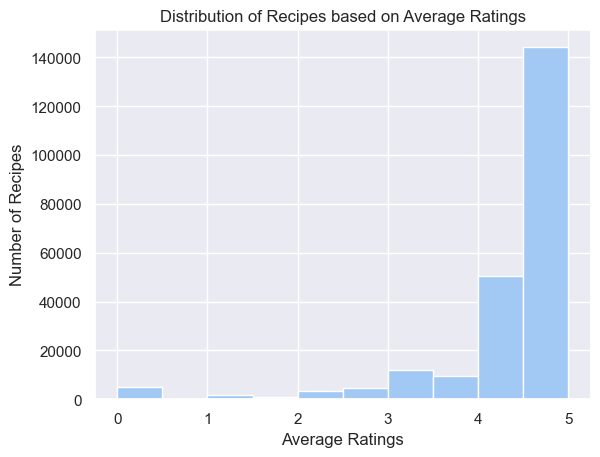

In [25]:
raw_interactions.groupby('recipe_id')['rating'].mean().reset_index().rating.plot(kind ='hist',title='Distribution of Recipes based on Average Ratings')
plt.xlabel("Average Ratings")
plt.ylabel("Number of Recipes")
plt.show()

Most of the recipes have average ratings of 5 and 4. Data seems highly biased. All recipes are good?

Try to summarize the interactions dataset for recipes with average rating for each recipe and the number of unique users who have rated it.

In [28]:
aggregation_strategy = {'rating' : ['mean'],'user_id' : ['nunique']}

In [29]:
recipe_interaction_summary = raw_interactions.groupby(['recipe_id']).agg(aggregation_strategy).reset_index()

In [30]:
recipe_interaction_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   (recipe_id, )       231637 non-null  int64  
 1   (rating, mean)      231637 non-null  float64
 2   (user_id, nunique)  231637 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 5.3 MB


Thus the interaction data of 231637 recipes have been summarized

In [31]:
recipe_interaction_summary.tail()

,recipe_id,rating,user_id
,,mean,nunique
231632,537459,5.0,1
231633,537485,5.0,1
231634,537543,0.0,1
231635,537671,0.0,1
231636,537716,5.0,1


In [33]:
recipe_interaction_summary.columns

MultiIndex([('recipe_id',        ''),
            (   'rating',    'mean'),
            (  'user_id', 'nunique')],
           )

The column index need to be adjusted

In [34]:
columns = pd.Index([c[0] + "_" +c[1] for c in recipe_interaction_summary.columns.tolist()])

In [35]:
recipe_interaction_summary.columns = columns

In [36]:
recipe_interaction_summary.columns

Index(['recipe_id_', 'rating_mean', 'user_id_nunique'], dtype='object')

In [37]:
recipe_interaction_final = recipe_interaction_summary[(recipe_interaction_summary['user_id_nunique']>2)]

In [38]:
recipe_interaction_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94564 entries, 0 to 231607
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recipe_id_       94564 non-null  int64  
 1   rating_mean      94564 non-null  float64
 2   user_id_nunique  94564 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 2.9 MB


If we take recipes rated by more than two unique users, the number of recipes come down to 94564
Let's have a look at the distribution of average ratings

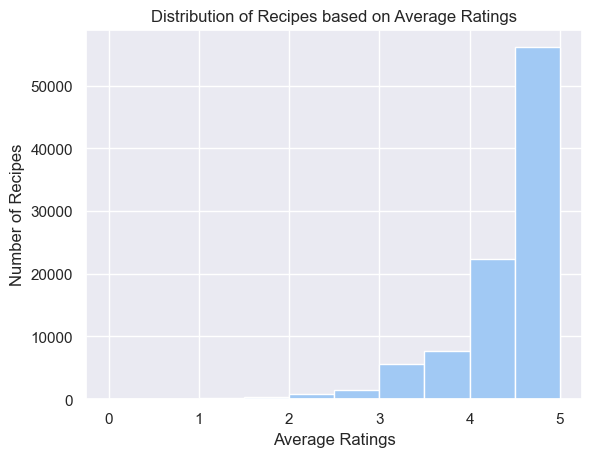

In [39]:
recipe_interaction_final.rating_mean.plot(kind ='hist',title='Distribution of Recipes based on Average Ratings')
plt.xlabel("Average Ratings")
plt.ylabel("Number of Recipes")
plt.show()

Now let's have a look at the recipes themselves

In [40]:
raw_recipes = pd.read_csv("../data/RAW_recipes.csv")

In [47]:
raw_recipes.shape

(231637, 12)

In [41]:
raw_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


Need to use only the recipes filtered by our interaction dataset above. Trying to do a merge operation.

In [45]:
recipes = pd.merge(raw_recipes,recipe_interaction_final,right_on = ['recipe_id_'],left_on = ['id'] ,how = 'inner')

In [46]:
recipes.shape

(94564, 15)

In [48]:
recipes.head(10)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,recipe_id_,rating_mean,user_id_nunique
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,137739,5.000000,3
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,31490,3.500000,4
2,beat this banana bread,75452,70,15892,2003-11-04,"['weeknight', 'time-to-make', 'course', 'main-...","[2669.3, 160.0, 976.0, 107.0, 62.0, 310.0, 138.0]",12,"['preheat oven to 350 degrees', 'butter two 9x...",from ann hodgman's,"['sugar', 'unsalted butter', 'bananas', 'eggs'...",9,75452,4.400000,5
3,better than sex strawberries,42198,1460,41531,2002-10-03,"['weeknight', 'time-to-make', 'course', 'main-...","[734.1, 66.0, 199.0, 10.0, 10.0, 117.0, 28.0]",8,['crush vanilla wafers into fine crumbs and li...,simple but sexy. this was in my local newspape...,"['vanilla wafers', 'butter', 'powdered sugar',...",7,42198,3.800000,5
4,better then bush s baked beans,67547,2970,85627,2003-07-26,"['weeknight', 'time-to-make', 'course', 'main-...","[462.4, 28.0, 214.0, 69.0, 14.0, 29.0, 23.0]",9,['in a very large sauce pan cover the beans an...,i'd have to say that this is a labor of love d...,"['great northern bean', 'chicken bouillon cube...",13,67547,3.900000,10
5,chicken lickin good pork chops,63986,500,14664,2003-06-06,"['weeknight', 'time-to-make', 'course', 'main-...","[105.7, 8.0, 0.0, 26.0, 5.0, 4.0, 3.0]",5,"['dredge pork chops in mixture of flour , salt...",here's and old standby i enjoy from time to ti...,"['lean pork chops', 'flour', 'salt', 'dry must...",7,63986,4.368421,19
6,chile rellenos,43026,45,52268,2002-10-14,"['60-minutes-or-less', 'time-to-make', 'course...","[94.0, 10.0, 0.0, 11.0, 11.0, 21.0, 0.0]",9,"['drain green chiles', 'sprinkle cornstarch on...",a favorite from a local restaurant no longer i...,"['egg roll wrap', 'whole green chilies', 'chee...",5,43026,4.045455,22
7,chinese candy,23933,15,35268,2002-03-29,"['15-minutes-or-less', 'time-to-make', 'course...","[232.7, 21.0, 77.0, 4.0, 6.0, 38.0, 8.0]",4,['melt butterscotch chips in heavy saucepan ov...,"a little different, and oh so good. i include ...","['butterscotch chips', 'chinese noodles', 'sal...",3,23933,4.833333,12
8,chinese chop suey,8559,70,4481,2001-01-27,"['weeknight', 'time-to-make', 'course', 'main-...","[395.4, 31.0, 20.0, 29.0, 51.0, 33.0, 8.0]",8,"['brown ground meat and onion in a large pot',...",easy one-pot dinner.,"['celery', 'onion', 'ground pork', 'soy sauce'...",7,8559,2.000000,4
9,cream of spinach soup,76808,45,95743,2003-11-17,"['60-minutes-or-less', 'time-to-make', 'course...","[126.0, 11.0, 2.0, 14.0, 5.0, 23.0, 4.0]",9,"['bring water and salt to a boil', 'cut the po...","wonderful comfort food from rozanne gold, a fa...","['water', 'salt', 'boiling potatoes', 'fresh s...",8,76808,4.666667,3


The authors have also given pre-processed recipe data wherein they have cleaned and encoded the ingredients in each recipe. 
Exploring the same here.

In [49]:
pp_recipes = pd.read_csv("../data/PP_recipes.csv")

In [50]:
print("Basic statistics about the data")
print("Shape: ", pp_recipes.shape)
print("Columns: ", pp_recipes.columns)
print("Sample data: ")
pp_recipes.tail(5)

Basic statistics about the data
Shape:  (178265, 8)
Columns:  Index(['id', 'i', 'name_tokens', 'ingredient_tokens', 'steps_tokens',
       'techniques', 'calorie_level', 'ingredient_ids'],
      dtype='object')
Sample data: 


,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
178260,323143,76862,"[40480, 6444, 1964, 9369, 486, 569, 17551, 40481]","[[8780], [11835, 1762, 4465, 31494], [6812], [...","[40480, 40482, 729, 2525, 715, 485, 26641, 404...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[840, 208, 2499, 2683, 1925, 335, 1511]"
178261,149114,145962,"[40480, 17027, 24715, 974, 11877, 40481]","[[6812], [5940], [30645, 4785, 6821], [6953], ...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[2499, 4717, 1168, 6270, 6324, 7040]"
178262,34200,65066,"[40480, 12187, 11434, 1738, 2627, 40481]","[[6167, 20930, 510], [1353], [15022, 6953], [6...","[40480, 40482, 500, 246, 1719, 5024, 240, 2366...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",2,"[2378, 7655, 3219, 2320, 5168, 5319, 4189, 268..."
178263,30618,77358,"[40480, 870, 488, 1325, 519, 2220, 2417, 488, ...","[[12395, 38308, 40118], [3137, 15022], [30878,...","[40480, 40482, 562, 481, 10734, 240, 23667, 58...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[5627, 2807, 5412, 3399, 7979, 1093, 1257, 780..."
178264,263840,137160,"[40480, 30565, 12316, 1024, 40481]","[[3151, 12486], [2507, 6444], [30565], [17918]...","[40480, 40482, 729, 2525, 10906, 485, 43, 2232...","[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[6473, 800, 4807, 2683, 335, 1563, 1511, 3248,..."


Try to merge it with our filtered recipe dataset from above

In [56]:
recipe_data = pd.merge(recipes[['id','name','description','n_ingredients','rating_mean','user_id_nunique']],pp_recipes[['id','ingredient_ids']],right_on = ['id'],left_on = ['id'] ,how = 'inner')

In [57]:
print("Basic statistics about the data")
print("Shape: ", recipe_data.shape)
print("Columns: ", recipe_data.columns)
print("Sample data: ")
recipe_data.head(5)

Basic statistics about the data
Shape:  (78925, 7)
Columns:  Index(['id', 'name', 'description', 'n_ingredients', 'rating_mean',
       'user_id_nunique', 'ingredient_ids'],
      dtype='object')
Sample data: 


,id,name,description,n_ingredients,rating_mean,user_id_nunique,ingredient_ids
0,137739,arriba baked winter squash mexican style,autumn is my favorite time of year to cook! th...,7,5.0,3,"[7933, 4694, 4795, 3723, 840, 5006, 6270]"
1,31490,a bit different breakfast pizza,this recipe calls for the crust to be prebaked...,6,3.5,4,"[5481, 6324, 2499, 4717, 6276, 1170]"
2,75452,beat this banana bread,from ann hodgman's,9,4.4,5,"[6906, 7367, 342, 2499, 2832, 5068, 911, 335, ..."
3,42198,better than sex strawberries,simple but sexy. this was in my local newspape...,7,3.8,5,"[7495, 840, 5695, 2499, 7705, 6846, 7642]"
4,67547,better then bush s baked beans,i'd have to say that this is a labor of love d...,13,3.9,10,"[3384, 1248, 2045, 4807, 1833, 5010, 3217, 488..."


The number of recipes on merging the interactions data with preprocessed recipe data has come down to 78925 recipes

Use cosine similarity on ingrediant ids to form a similarity matrix of recipes

In [60]:
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.preprocessing import MultiLabelBinarizer

In [73]:
# create a MultiLabelBinarizer object to perform one-hot encoding
mlb = MultiLabelBinarizer()

batch_size = 5000

# create a list to hold the cosine similarity matrices for each batch
cosine_sim_matrices = []

# loop through the dataframe in batches
for i in range(0, len(recipe_data), batch_size):
    # select the next batch of rows
    batch = recipe_data.iloc[i:i+batch_size]
    
    # fit the MultiLabelBinarizer object on the 'ingredient_ids' column of the batch
    ingredient_vectors = mlb.fit_transform(batch['ingredient_ids'])

    # calculate cosine similarity matrix for the batch
    cosine_sim = cosine_similarity(ingredient_vectors)

    # append the cosine similarity matrix to the list
    cosine_sim_matrices.append(cosine_sim)
    
# concatenate the cosine similarity matrices for each batch
cosine_sim_matrix = np.concatenate(cosine_sim_matrices)

# convert cosine similarity matrix to a pandas dataframe for readability
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, columns=recipe_data.index, index=recipe_data.index)

# print cosine similarity matrix
print(cosine_sim_df)

ValueError: Shape of passed values is (75000, 5000), indices imply (78925, 78925)

In [69]:
ingredient_vectors.shape

(78925, 14)

In [65]:
# calculate cosine similarity matrix
cosine_sim = cosine_similarity(ingredient_vectors)

MemoryError: Unable to allocate 46.4 GiB for an array with shape (78925, 78925) and data type float64

In [ ]:
# convert cosine similarity matrix to a pandas dataframe for readability
cosine_sim_df = pd.DataFrame(cosine_sim, columns=df.index, index=df.index)

# print cosine similarity matrix
print(cosine_sim_df)